In [1]:
import os
import sys
from pathlib import Path

sys.path.append(str(Path().cwd().parent.parent))

In [2]:
import numpy as np
from tqdm import tqdm
from dataset.patch_dataset import BrainPatchesDataModule
from models.UNetModule import UNet3
from dataset.roi_extraction import slice_image, reconstruct_patches
from utils import z_score_norm
import SimpleITK as sitk
import torch
from models.EM import ExpectationMaximization
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from brain_segmenter import BrainSegmenter

/home/user0/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
p = Path('/home/user0/misa_vlex/brain_segmentation/data/Training_Set/IBSR_03/IBSR_03.nii.gz')

img_xyz = sitk.GetArrayFromImage(sitk.ReadImage(str(p)))
# rearrange axes with numpy
img_yzx = np.transpose(img_xyz, (1, 2, 0))
img_zxy = np.transpose(img_xyz, (2, 0, 1))

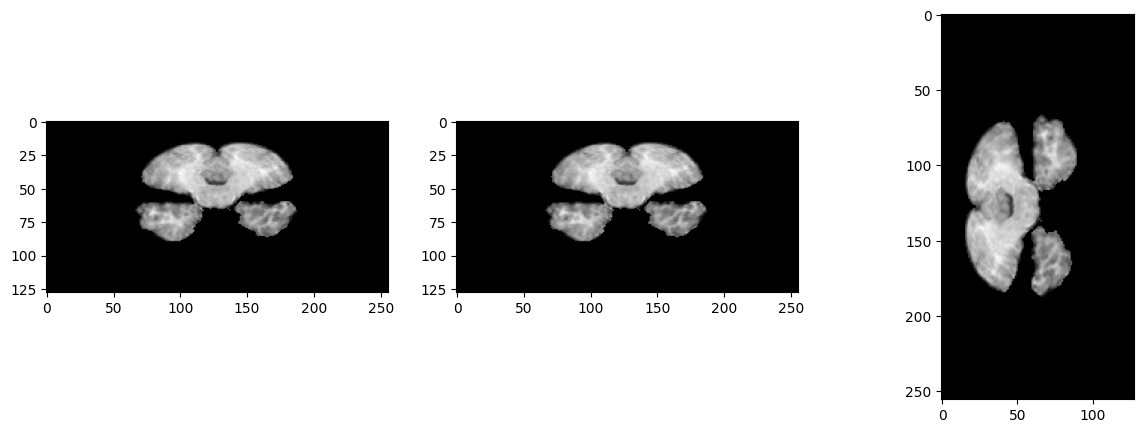

In [10]:
slice = 100

# plot same slice in different axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_xyz[slice, :, :], cmap='gray')
axs[1].imshow(img_yzx[:, :, slice], cmap='gray')
axs[2].imshow(img_zxy[:, slice, :], cmap='gray')

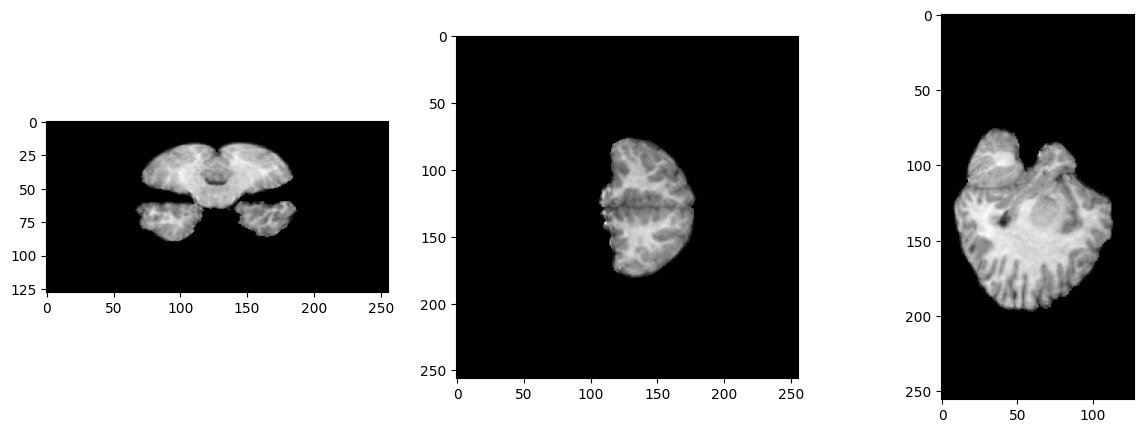

In [12]:
slice = 100

# plot same slice in different axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_xyz[slice, :, :], cmap='gray')
axs[1].imshow(img_yzx[slice, :, :], cmap='gray')
axs[2].imshow(img_zxy[slice, :, :], cmap='gray')

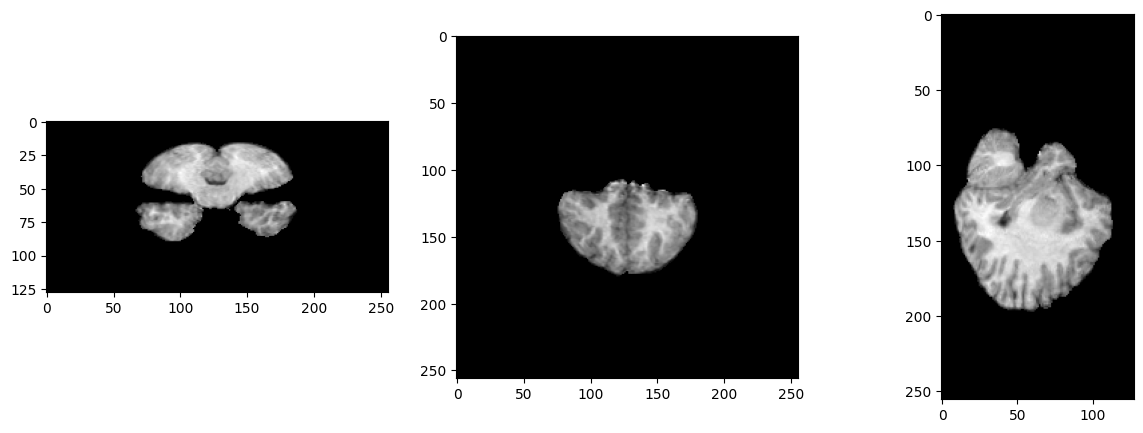

In [13]:
slice = 100

# plot same slice in different axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_xyz[slice, :, :], cmap='gray')
axs[1].imshow(img_xyz[:, slice, :], cmap='gray')
axs[2].imshow(img_xyz[:, :, slice], cmap='gray')

In [20]:
img_xyz2 = np.transpose(img_yzx, (2, 0, 1))
img_xyz3 = np.transpose(img_zxy, (1, 2, 0))

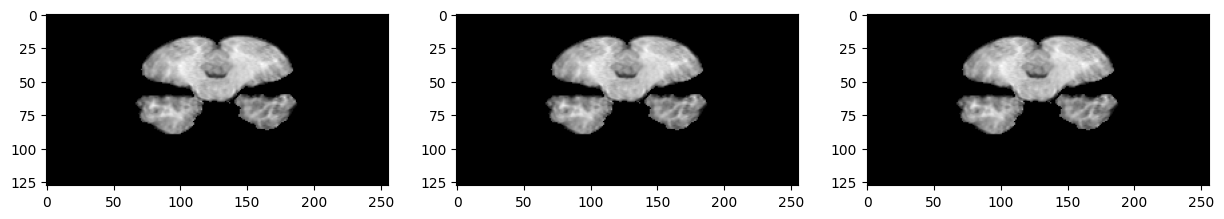

In [21]:
slice = 100

# plot same slice in different axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_xyz[slice, :, :], cmap='gray')
axs[1].imshow(img_xyz2[slice, :, :], cmap='gray')
axs[2].imshow(img_xyz3[slice, :, :], cmap='gray')

In [22]:
from scipy.stats import mode

In [33]:
a = np.ones((3,3,3))
b = a + 1
b[1,1,1] = 1
c = np.ones((3,3,3)) + 1
d = np.stack((a, b, c), axis=0)

In [34]:
d.shape

(3, 3, 3, 3)

In [37]:
d = np.stack((a, b, c), axis=0)
res, counts = mode(d, axis=0, keepdims=False)

res.shape

(3, 3, 3)

In [38]:
res

array([[[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [2., 1., 2.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]])